In [1]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=92f81e4351a2f37d0b0ae9c640de132b2d22bbf4b8f99f9f73ae59b6e5c55e1e
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=28893699857bae5aca223c1772230c36bcd4636b3c2f5238edf5344f827cc6bf
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime

In [3]:
import yfinance as yf
import pandas as pd

# Fetch Price

In [4]:
Eth_price = yf.download(tickers='ETH-USD', period = '4y', interval = '1d')['Adj Close']
Eth_price.head()

[*********************100%***********************]  1 of 1 completed


Date
2017-07-11    197.404007
2017-07-12    230.774002
2017-07-13    209.733002
2017-07-14    199.662003
2017-07-15    170.654999
Name: Adj Close, dtype: float64

In [5]:
Eth_price.tail()

Date
2021-07-07    2315.161865
2021-07-08    2120.026367
2021-07-09    2146.692383
2021-07-10    2111.403564
2021-07-11    2145.942871
Name: Adj Close, dtype: float64

# Plots

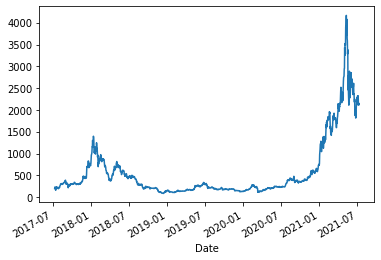

In [6]:
import matplotlib.pyplot as plt
Eth_price.plot()
plt.show()

In [7]:
Eth_daily_returns = Eth_price.pct_change().dropna(axis=0)
type(Eth_price)

pandas.core.series.Series

In [8]:
Eth_daily_cum_returns = (Eth_daily_returns +1).cumprod()-1
Eth_daily_cum_returns

Date
2017-07-12     0.169044
2017-07-13     0.062456
2017-07-14     0.011438
2017-07-15    -0.135504
2017-07-16    -0.202838
                ...    
2021-07-07    10.728039
2021-07-08     9.739531
2021-07-09     9.874614
2021-07-10     9.695850
2021-07-11     9.870817
Name: Adj Close, Length: 1457, dtype: float64

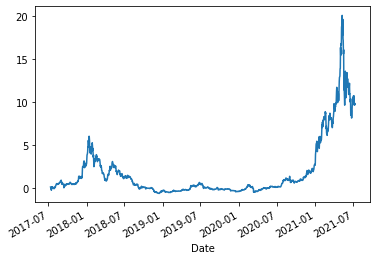

In [9]:
Eth_daily_cum_returns.plot()
plt.show()

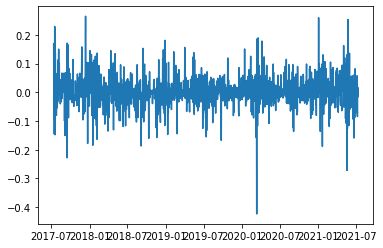

In [10]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.plot(Eth_daily_returns)

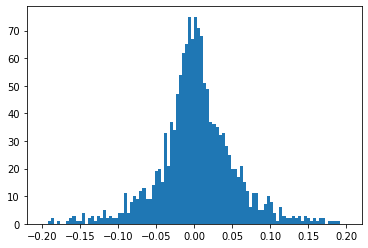

In [11]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.hist(Eth_daily_returns,bins=100,range=(-0.2,0.2))
plt.show()

In [12]:
Eth_price1 = yf.download(tickers='ETH-USD', period = '4y', interval = '1d')
Eth_price1.head()
type(Eth_price1)

[*********************100%***********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [13]:
Eth_daily_returns1 = Eth_price1.pct_change().dropna(axis=0)
type(Eth_daily_returns1)

pandas.core.frame.DataFrame

In [14]:
Eth_daily_returns = Eth_daily_returns1['Adj Close']
type(Eth_daily_returns)

pandas.core.series.Series

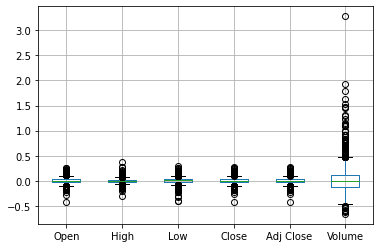

In [15]:
#fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
Eth_daily_returns1.boxplot()#column='Adj Close')
plt.show()

# Prediction

In [16]:
pip install Prophet

     |████████████████████████████████| 65 kB 735 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.5 MB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6643589 sha256=74383cec550125dd97f6235756957707760e5eba8b0e050ee38b2d0fa7d0c286
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [85]:
from fbprophet import Prophet
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [86]:
import datetime as dt


In [87]:
Eth_df = yf.download(tickers='ETH-USD', period = '6y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [88]:
modelfb = Prophet()
Eth_df = Eth_df.reset_index()
Eth_df[['ds','y']] = Eth_df[['Date','Adj Close']]
modelfb.fit(Eth_df)


In [89]:
future = modelfb.make_future_dataframe(periods=180)

In [90]:
forecast = modelfb.predict(future)

In [91]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

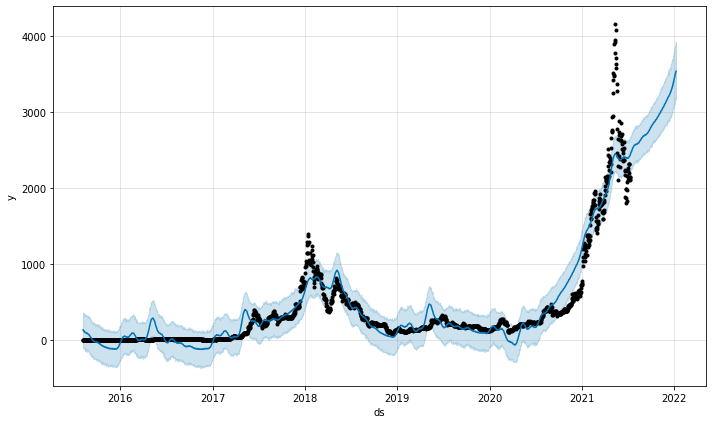

In [92]:
modelfb.plot(forecast)
plt.show()

In [93]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()